In [1]:
# 대표적인 비지도(Unsupervised) 학습 방법인 Autoencoder 를 구현해봅니다.

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)



c:\users\8306\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\8306\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\8306\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\8306\appdata\

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
#########

# 옵션 설정
learning_rate = 0.01
training_epoch = 20
batch_size = 100

# 신경망 레이어 구성 옵션
n_hidden = 256  
n_input = 28*28   






In [3]:
#########


# 신경망 모델 구성

X = tf.placeholder(tf.float32, [None, n_input])

# input -> encode -> decode -> output
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

# 인코더 레이어 구성
encoder = tf.nn.sigmoid(
                tf.add(tf.matmul(X, W_encode), b_encode))

W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

# 디코더 레이어 구성
decoder = tf.nn.sigmoid(
                tf.add(tf.matmul(encoder, W_decode), b_decode))

cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)




In [4]:
#########

# 신경망 모델 학습

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')



Epoch: 0001 Avg. cost = 0.2046
Epoch: 0002 Avg. cost = 0.0571
Epoch: 0003 Avg. cost = 0.0469
Epoch: 0004 Avg. cost = 0.0435
Epoch: 0005 Avg. cost = 0.0401
Epoch: 0006 Avg. cost = 0.0382
Epoch: 0007 Avg. cost = 0.0372
Epoch: 0008 Avg. cost = 0.0353
Epoch: 0009 Avg. cost = 0.0343
Epoch: 0010 Avg. cost = 0.0335
Epoch: 0011 Avg. cost = 0.0328
Epoch: 0012 Avg. cost = 0.0322
Epoch: 0013 Avg. cost = 0.0317
Epoch: 0014 Avg. cost = 0.0306
Epoch: 0015 Avg. cost = 0.0297
Epoch: 0016 Avg. cost = 0.0295
Epoch: 0017 Avg. cost = 0.0292
Epoch: 0018 Avg. cost = 0.0289
Epoch: 0019 Avg. cost = 0.0286
Epoch: 0020 Avg. cost = 0.0284
최적화 완료!


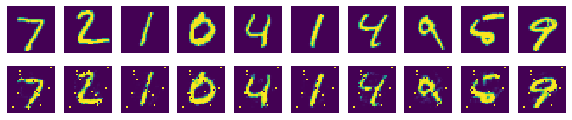

In [5]:
#########


# 결과 확인

sample_size = 10

samples = sess.run(decoder,
                   feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()

